In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_path = "data/laureates-1000.json"

In [4]:
with open(file_path, 'r') as file:
    data = json.load(file)

In [5]:
laureates = data['laureates']

In [6]:
len(laureates)

992

In [7]:
laureates[:1]

[{'id': '745',
  'knownName': {'en': 'A. Michael Spence', 'se': 'A. Michael Spence'},
  'givenName': {'en': 'A. Michael', 'se': 'A. Michael'},
  'familyName': {'en': 'Spence', 'se': 'Spence'},
  'fullName': {'en': 'A. Michael Spence', 'se': 'A. Michael Spence'},
  'fileName': 'spence',
  'gender': 'male',
  'birth': {'date': '1943-00-00',
   'place': {'city': {'en': 'Montclair, NJ',
     'no': 'Montclair, NJ',
     'se': 'Montclair, NJ'},
    'country': {'en': 'USA', 'no': 'USA', 'se': 'USA'},
    'cityNow': {'en': 'Montclair, NJ',
     'no': 'Montclair, NJ',
     'se': 'Montclair, NJ',
     'sameAs': ['https://www.wikidata.org/wiki/Q678437',
      'https://www.wikipedia.org/wiki/Montclair,_New_Jersey'],
     'latitude': '40.825930',
     'longitude': '-74.209030'},
    'countryNow': {'en': 'USA',
     'no': 'USA',
     'se': 'USA',
     'sameAs': ['https://www.wikidata.org/wiki/Q30'],
     'latitude': '39.828175',
     'longitude': '-98.579500'},
    'continent': {'en': 'North America

In [8]:
# Some entries do not have a gender field.
# These are prizes awarded to organizations or to multiple people.
# Each of these prizes are awarded in the Peace category so will not effect our analysis.
laureates_without_gender = [laureate for laureate in laureates if not laureate.get('gender', False) ]
prizes = [prize for laureate in laureates_without_gender for prize in laureate['nobelPrizes']]
categories = [prize['category'] for prize in prizes]
en = [lang['en'] for lang in categories]
# Create a set of unique category names
category_set = set(en)
print(category_set)

{'Peace'}


In [9]:
list(category_set)

['Peace']

In [10]:
# Create a list to hold our extracted data
extracted_data = []

# Iterate over each laureate to extract gender and awardYear information
for laureate in laureates:
    gender = laureate.get('gender')
    # Remove entries that do not have a gender as these will be a group award
    if gender:
      knownName = laureate.get('knownName', {})
      name = knownName.get('en', 'unknown')
      links = laureate.get('links', {})
      href = links[0].get('href', 'unknown')
      for prize in laureate.get('nobelPrizes', []):
          year = prize.get('awardYear')
          category = prize.get('category', {})
          if category:
            category = category.get('en', 'unknown')
          if category in ['Literature', 'Peace']:  # Exclude 'Literature' and 'Peace'
            continue
          motivation = prize.get('motivation', {})
          if motivation:
            motivation = motivation.get('en', 'unknown')
          if year:
              extracted_data.append({'year': int(year), 'gender': gender, 'name': name, 'href': href, 'category': category, 'motivation': motivation})

In [11]:
len(extracted_data)

739

In [12]:
# Convert the list to a DataFrame
df = pd.DataFrame(extracted_data)

In [13]:
# Extract all unique category names
categories = set()
for category in df['category']:
    categories.add(category)

print(categories)

{'Chemistry', 'Economic Sciences', 'Physiology or Medicine', 'Physics'}


In [14]:
df.head()

,year,gender,name,href,category,motivation
0,2001,male,A. Michael Spence,https://api.nobelprize.org/2/laureate/745,Economic Sciences,for their analyses of markets with asymmetric ...
1,1975,male,Aage N. Bohr,https://api.nobelprize.org/2/laureate/102,Physics,for the discovery of the connection between co...
2,2004,male,Aaron Ciechanover,https://api.nobelprize.org/2/laureate/779,Chemistry,for the discovery of ubiquitin-mediated protei...
3,1982,male,Aaron Klug,https://api.nobelprize.org/2/laureate/259,Chemistry,for his development of crystallographic electr...
4,1979,male,Abdus Salam,https://api.nobelprize.org/2/laureate/114,Physics,for their contributions to the theory of the u...


In [15]:
# Group by year and gender, and count the occurrences
gender_distribution = df.groupby(by=['year', 'gender'])
gender_distribution.head()

,year,gender,name,href,category,motivation
0,2001,male,A. Michael Spence,https://api.nobelprize.org/2/laureate/745,Economic Sciences,for their analyses of markets with asymmetric ...
1,1975,male,Aage N. Bohr,https://api.nobelprize.org/2/laureate/102,Physics,for the discovery of the connection between co...
2,2004,male,Aaron Ciechanover,https://api.nobelprize.org/2/laureate/779,Chemistry,for the discovery of ubiquitin-mediated protei...
3,1982,male,Aaron Klug,https://api.nobelprize.org/2/laureate/259,Chemistry,for his development of crystallographic electr...
4,1979,male,Abdus Salam,https://api.nobelprize.org/2/laureate/114,Physics,for their contributions to the theory of the u...
...,...,...,...,...,...,...
717,1915,male,William Bragg,https://api.nobelprize.org/2/laureate/20,Physics,for their services in the analysis of crystal ...
722,1949,male,William F. Giauque,https://api.nobelprize.org/2/laureate/209,Chemistry,for his contributions in the field of chemical...
728,1934,male,William P. Murphy,https://api.nobelprize.org/2/laureate/328,Physiology or Medicine,for their discoveries concerning liver therapy...
730,1955,male,Willis E. Lamb,https://api.nobelprize.org/2/laureate/63,Physics,for his discoveries concerning the fine struct...


In [16]:
gender_size = gender_distribution.size()
gender_size.head()

year  gender
1901  male      3
1902  male      4
1903  female    1
      male      4
1904  male      3
dtype: int64

In [17]:
gender_unstack = gender_size.unstack(fill_value=0)
gender_unstack.head()

gender,female,male
year,,
1901,0,3
1902,0,4
1903,1,4
1904,0,3
1905,0,3


In [18]:
# Add a column for the total number of laureates
gender_unstack['total'] = gender_unstack.sum(axis=1)

In [19]:
gender_unstack.head()

gender,female,male,total
year,,,
1901,0,3,3
1902,0,4,4
1903,1,4,5
1904,0,3,3
1905,0,3,3


In [20]:
# Add a new column for the percentage of winners which are male per year
gender_unstack["male_percentage"] = gender_unstack["male"] / gender_unstack["total"]
gender_unstack["female_percentage"] = gender_unstack["female"] / gender_unstack["total"]

In [24]:
gender_unstack.sort_index(inplace=True)

In [25]:
gender_unstack.head()

gender,female,male,total,male_percentage,female_percentage
year,,,,,
1901,0,3,3,1.0,0.0
1902,0,4,4,1.0,0.0
1903,1,4,5,0.8,0.2
1904,0,3,3,1.0,0.0
1905,0,3,3,1.0,0.0


In [26]:
# Count the number of male and female laureates per decade
gender_unstack['decade'] = (gender_unstack.index // 10) * 10


In [27]:
gender_unstack.head()

gender,female,male,total,male_percentage,female_percentage,decade
year,,,,,,
1901,0,3,3,1.0,0.0,1900
1902,0,4,4,1.0,0.0,1900
1903,1,4,5,0.8,0.2,1900
1904,0,3,3,1.0,0.0,1900
1905,0,3,3,1.0,0.0,1900


In [28]:
gender_decade_count = gender_unstack.groupby('decade')[['female', 'male']].sum()
gender_decade_count

gender,female,male
decade,,
1900,1,32
1910,1,23
1920,0,33
1930,1,37
1940,1,29
1950,0,54
1960,2,57
1970,1,79
1980,3,73


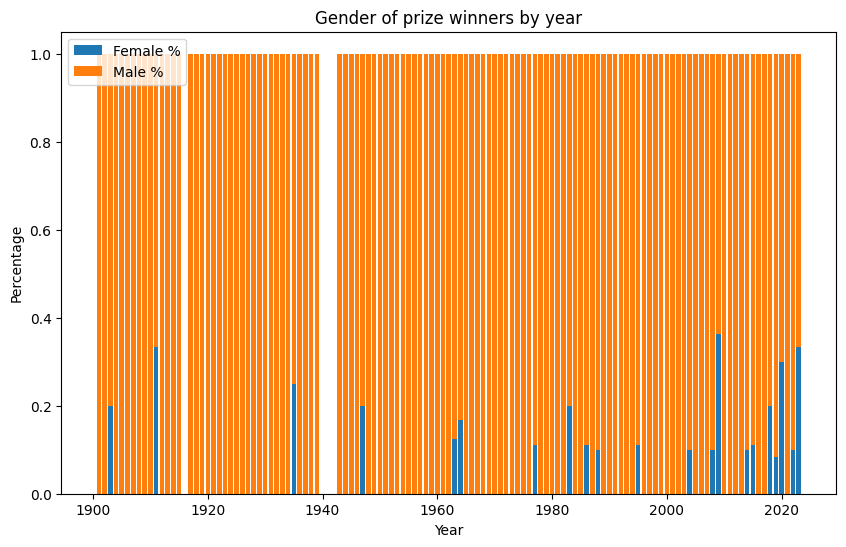

In [56]:
# Plot the percentage
plt.figure(figsize=(10, 6))
plt.bar(gender_unstack.index, gender_unstack['female_percentage'], label='Female %')
plt.bar(gender_unstack.index, gender_unstack['male_percentage'], bottom=gender_unstack['female_percentage'], label='Male %')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Gender of prize winners by year')
plt.legend(loc='upper left')

plt.show()

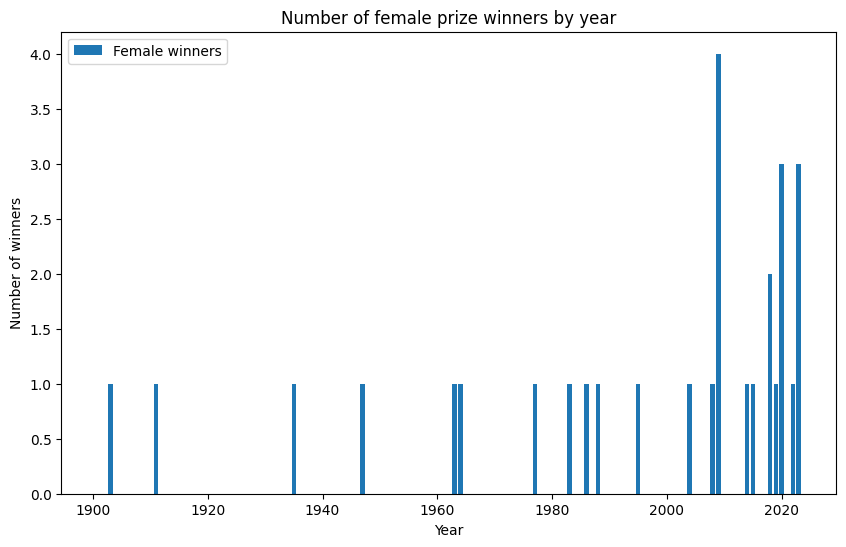

In [57]:
# Plot the percentage
plt.figure(figsize=(10, 6))
plt.bar(gender_unstack.index, gender_unstack['female'], label='Female winners')

plt.xlabel('Year')
plt.ylabel('Number of winners')
plt.title('Number of female prize winners by year')
plt.legend(loc='upper left')

plt.show()

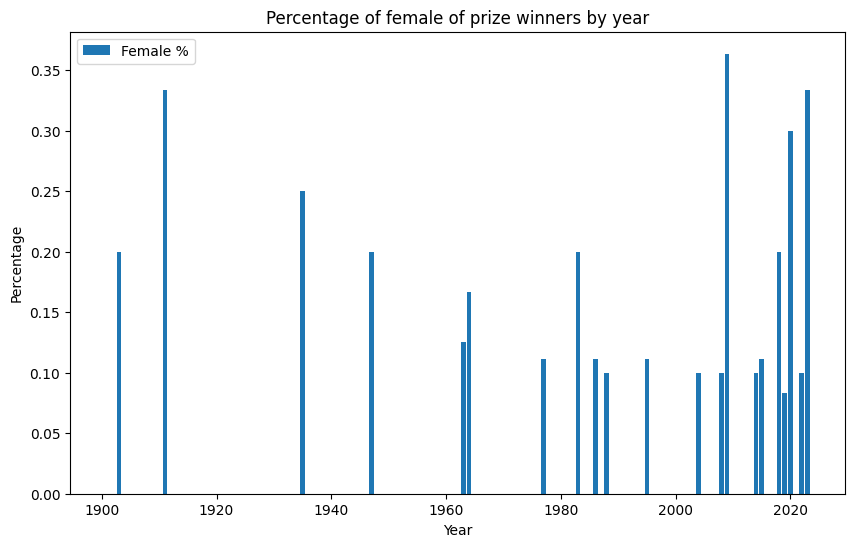

In [58]:
# Plot the percentage
plt.figure(figsize=(10, 6))
plt.bar(gender_unstack.index, gender_unstack['female_percentage'], label='Female %')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of female of prize winners by year')
plt.legend(loc='upper left')

plt.show()

In [34]:
female_winners = df[df['gender'] == "female"]

In [35]:
# Save the gemale_winners data to a CSV file
file_path = 'data/female-winners.csv'
female_winners.to_csv(file_path, index=False)

<Axes: title={'center': 'Female prizes by category'}, xlabel='category'>

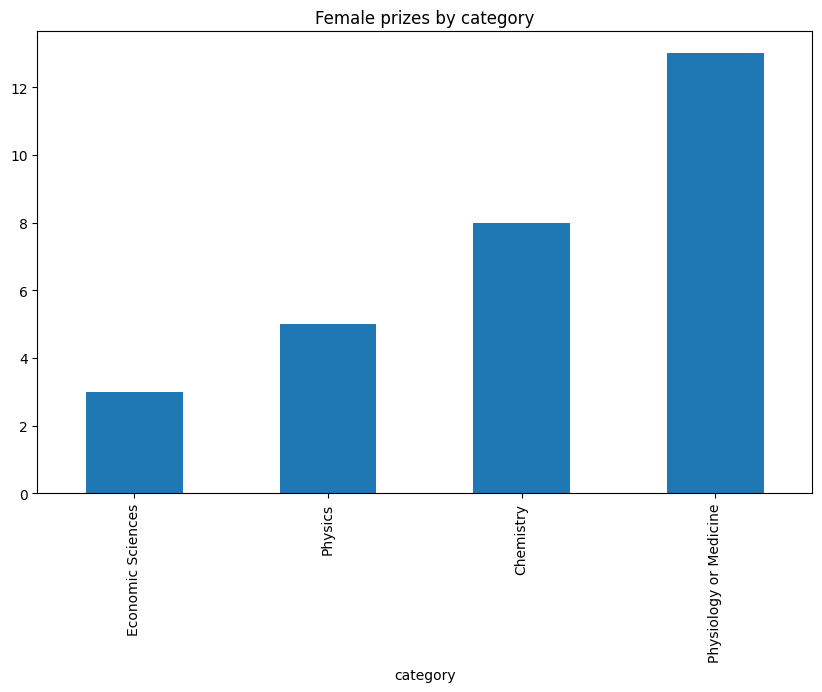

In [36]:
female_winners.groupby('category').size().sort_values(ascending=True).plot(kind='bar', figsize=(10, 6), title='Female prizes by category')

<Axes: title={'center': 'Male prizes by category'}, xlabel='category'>

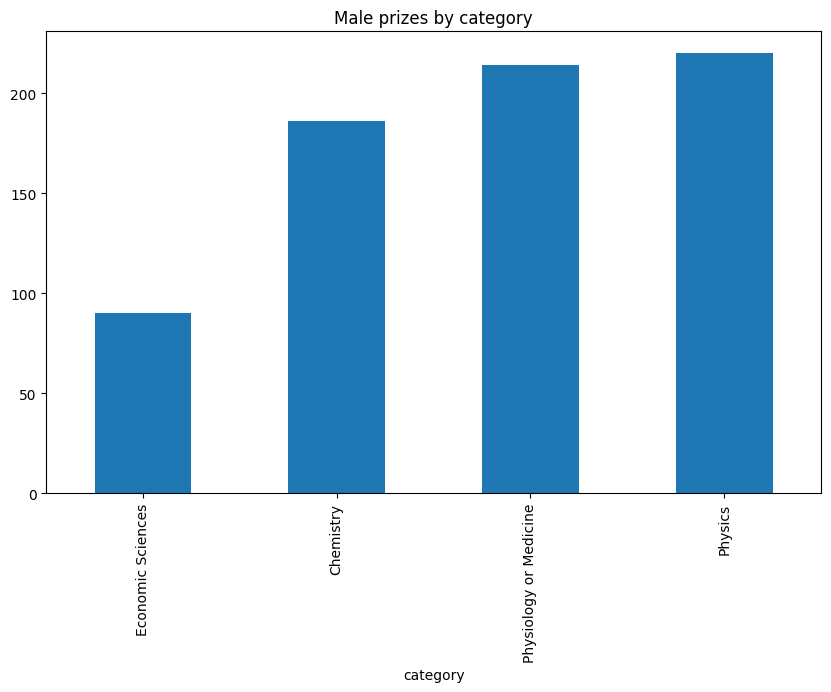

In [37]:
df[df['gender'] == "male"].groupby('category').size().sort_values(ascending=True).plot(kind='bar', figsize=(10, 6), title='Male prizes by category')

In [38]:
# Group by 'gender' and 'category' and calculate the sum
category_grouped = df.groupby(['gender', 'category']).size().unstack(fill_value=0)

In [39]:
category_grouped.head()

category,Chemistry,Economic Sciences,Physics,Physiology or Medicine
gender,,,,
female,8,3,5,13
male,186,90,220,214


In [40]:
# Create an array with the positions of the bars on the x axis
x = np.arange(len(category_grouped.columns))

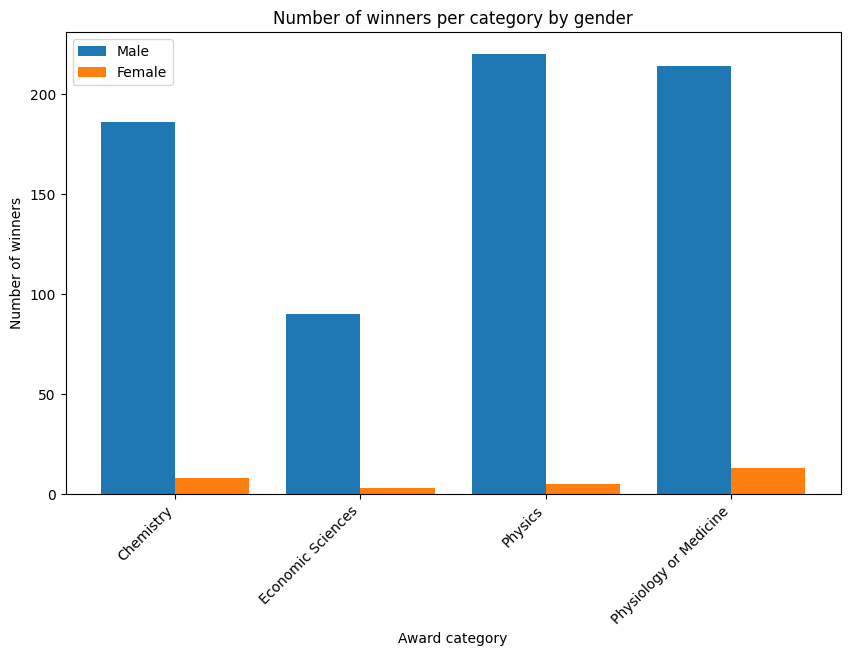

In [41]:
plt.figure(figsize=(10, 6))
# Plot the 'male' bars
plt.bar(x - 0.2, category_grouped.loc['male'], width=0.4, label='Male')
# Plot the 'female' bars
plt.bar(x + 0.2, category_grouped.loc['female'], width=0.4, label='Female')
# Replace the x ticks with the category names
plt.xticks(x, category_grouped.columns, rotation=45, ha='right')

plt.xlabel('Award category')
plt.ylabel('Number of winners')
plt.title('Number of winners per category by gender')
plt.legend(loc='upper left')

plt.show()